Name: Snehal Nalawade

ID: 202151160

In [ ]:
!pip install joypy squarify

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
from joypy import joyplot
import squarify
import plotly.express as px
from itertools import product

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
milk_df = pd.read_csv("/content/drive/MyDrive/DAV sem 6/Milk_Production_2007_2012.csv", index_col='States/Uts')
milk_df.head()

,2007-08,2008-09,2009-10,2010-11,2011-12
States/Uts,,,,,
Andhra Pradesh,8925,9570,10429,11203,12088
Arunachal Pradesh,32,24,26,28,22
Assam,752,753,756,790,796
Bihar,5783,5934,6124,6517,6643
Chhattisgarh,866,908,956,1029,1119


In [ ]:
egg_df = pd.read_csv("/content/drive/MyDrive/DAV sem 6/Egg_Production_2007_2012.csv", index_col='States/Uts')
egg_df.columns = milk_df.columns
egg_df.head()

,2007-08,2008-09,2009-10,2010-11,2011-12
States/Uts,,,,,
Andhra Pradesh,175884,183446,193958,201277,212103
Arunachal Pradesh,394,361,380,407,419
Assam,4910,4659,4671,4707,4705
Bihar,10707,10740,11002,7446,7552
Chhattisgarh,9184,9738,10520,12454,12984


In [ ]:
merged_df = pd.concat([egg_df, milk_df], axis=1, keys=['Eggs', 'Milk'])
merged_df.fillna(0, inplace=True)
merged_df.head()

Eggs                                            Milk  \
                    2007-08   2008-09   2009-10   2010-11   2011-12 2007-08   
States/Uts                                                                    
Andhra Pradesh     175884.0  183446.0  193958.0  201277.0  212103.0  8925.0   
Arunachal Pradesh     394.0     361.0     380.0     407.0     419.0    32.0   
Assam                4910.0    4659.0    4671.0    4707.0    4705.0   752.0   
Bihar               10707.0   10740.0   11002.0    7446.0    7552.0  5783.0   
Chhattisgarh         9184.0    9738.0   10520.0   12454.0   12984.0   866.0   

                                                      
                  2008-09  2009-10  2010-11  2011-12  
States/Uts                                            
Andhra Pradesh     9570.0  10429.0  11203.0  12088.0  
Arunachal Pradesh    24.0     26.0     28.0     22.0  
Assam               753.0    756.0    790.0    796.0  
Bihar              5934.0   6124.0   6517.0   6643.0  
Chhattisgarh        908.0    956.0   1029.0   1119.0

In [ ]:
eggtemp = egg_df.copy()
milktemp = milk_df.copy()
eggtemp.columns = pd.MultiIndex.from_product([egg_df.columns, ['Egg']])
milktemp.columns = pd.MultiIndex.from_product([milk_df.columns, ['Milk']])
merged_df1 = eggtemp[['2007-08']].join(milktemp[['2007-08']])
for year, item in eggtemp.columns[1:]:
    temp = eggtemp[[year]].join(milktemp[[year]])
    merged_df1 = merged_df1.join(temp)
merged_df1.fillna(0, inplace=True)
merged_df1.head()

2007-08         2008-09         2009-10          2010-11  \
                      Egg    Milk     Egg    Milk     Egg     Milk     Egg   
States/Uts                                                                   
Andhra Pradesh     175884  8925.0  183446  9570.0  193958  10429.0  201277   
Arunachal Pradesh     394    32.0     361    24.0     380     26.0     407   
Assam                4910   752.0    4659   753.0    4671    756.0    4707   
Bihar               10707  5783.0   10740  5934.0   11002   6124.0    7446   
Chhattisgarh         9184   866.0    9738   908.0   10520    956.0   12454   

                           2011-12           
                      Milk     Egg     Milk  
States/Uts                                   
Andhra Pradesh     11203.0  212103  12088.0  
Arunachal Pradesh     28.0     419     22.0  
Assam                790.0    4705    796.0  
Bihar               6517.0    7552   6643.0  
Chhattisgarh        1029.0   12984   1119.0

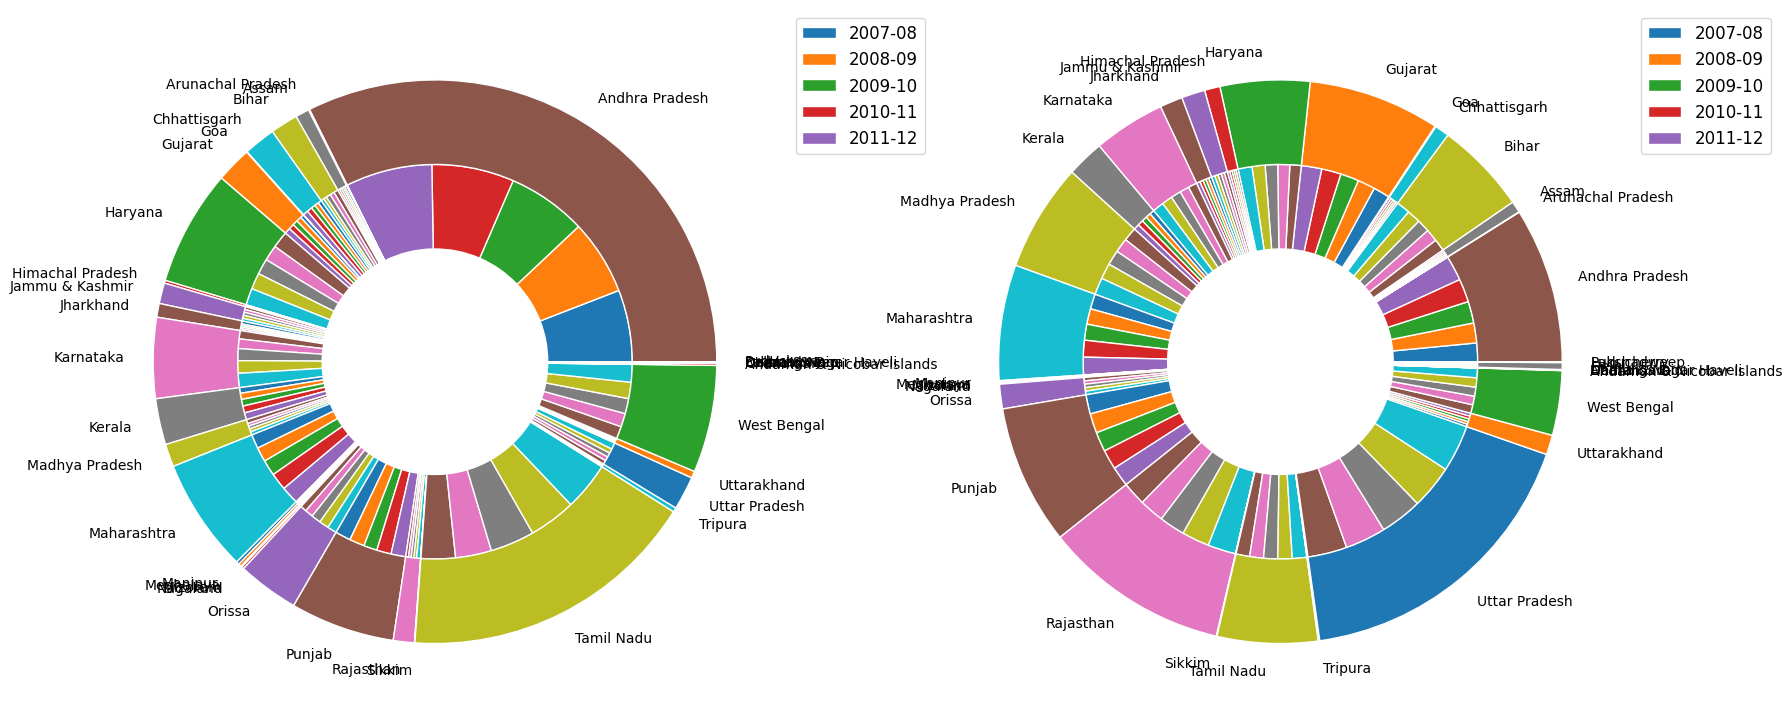

In [ ]:
states = merged_df1[:35].index
cmap = plt.get_cmap("tab20c")
_, ax = plt.subplots(1, 2, figsize=(20, 10))
size=0.3

ax[0].pie(merged_df.loc[states, 'Eggs'].to_numpy().flatten(), radius=1-size, wedgeprops=dict(width=0.3, edgecolor='w'))
ax[0].pie(merged_df.loc[states, 'Eggs'].to_numpy().sum(axis=1), radius=1, wedgeprops=dict(width=0.3, edgecolor='w'), labels=states)
ax[0].legend(merged_df[['Eggs']].columns.get_level_values(1), loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

ax[1].pie(merged_df.loc[states, 'Milk'].to_numpy().flatten(), radius=1-size, wedgeprops=dict(width=0.3, edgecolor='w'))
ax[1].pie(merged_df.loc[states, 'Milk'].to_numpy().sum(axis=1), radius=1, wedgeprops=dict(width=0.3, edgecolor='w'), labels=states)
ax[1].legend(merged_df[['Milk']].columns.get_level_values(1), loc='upper left', bbox_to_anchor=(1, 1), fontsize=12);

In [ ]:
egg_df = merged_df['Eggs'].drop('All India').reset_index()
egg_df = egg_df.melt(id_vars='States/Uts', var_name='Year', value_name='Production')
fig = px.treemap(egg_df, path=['States/Uts', 'Year'], values='Production', color_continuous_scale='RdBu')
fig.show()

In [ ]:
milk_df = merged_df['Milk'].drop('All India').reset_index()
milk_df = milk_df.melt(id_vars='States/Uts', var_name='Year', value_name='Production')
fig = px.treemap(milk_df, path=['States/Uts', 'Year'], values='Production', color_continuous_scale='RdBu')
fig.show()